# Project 02 - Due Friday, October 13 at 12pm

*Objectives*: Design a relational database schema for transaction processing. Use SQL to load the data into the database and retrieve information from the database.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, shell commands, diagrams and markdown cells.  The notebook itself should be completely reproducible (using AWS EC2 instance based on the provided AMI) from start to finish; another person should be able to use the code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in groups**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, October 13, 12pm.  One member of each group must submit your notebook to Blackboard; you should not submit it separately.

### Group Members:
* Guangyu Xing
* Jiwei (Wayne) Zeng
* Hangman (Agnes) Jiang
* Pei-Hsuan Hsia

## Part 1 - Requirements

The city is going to launch a new bike sharing system. Your task is to design a relational database to support its operation. The bike sharing system works as follows:

1. Riders can buy annual, semiannual or monthly membership. We need to have a record of each member's name and address in order to send them a key. Keys can be used to check out bikes at any bike station. Members have the option to renew their memberships before they expire. A member becomes inactive when his or her membership expires, therefore we need to know when their memberships expire. 

1. Each bike station has a pubic name (i.e. "18th & C St NW"). Occasionally in response to public requests, stations can be renamed. Each bike station have been built with a number of docking points.

1. Each bike is either serviceable or disabled. If it is disabled, it is removed from the station for repair.

1. For simplicity's sake, each serviceable bike is either docked at a station or checked out by a member. If it is checked out by a member, the system needs to know who has checked it out and when.

Your database should minimally support the above requirements.

## Part 2 - Designing a Database Schema (35 points)

Based on what you read above, design a relational database schema consisting of *at least* 3 tables. Document your schema with a schema diagram.  There are several tools available for this, such as [Google Drawings](https://docs.google.com/drawings/) and Microsoft Visio. Make sure to include the schema diagram in your submission. Embed and display the diagram in your notebook. **Discuss your major design decisions.** Be aware that your schema is designed to support transaction processing and should be optimized for writes and data consistency.

We are looking for the following when grade this part of the project:

* All required attributes are recorded.
* In the schema diagram, all primary keys are underlined. Directed lines are drawn from the foreign keys to the primary keys.
* Your database schema should be designed to promite data consistency and integrity and reduce the duplication of data. Strive for 3NF.
* Your database schema should be designed to support the requirements described in Part 1, as well as problems in Part 4 and 5.
* Key design decisions are discussed and documented in Markdown cells.

See slide 23 of week-04 lecture for an example of schema diagram. 

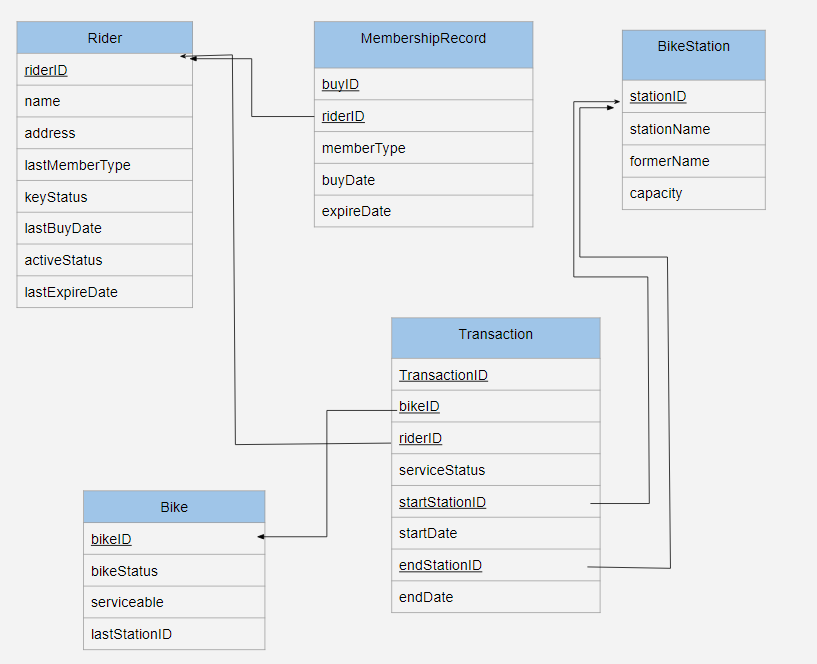


### Table Rider: The information of riders
__RiderID:__ The ID of each rider. The primary key of the table Rider. The type of its value is text and its value cannot be null.  
__Name:__ The name of each rider. The type of its value is text and its value cannot be null.  
__lastMemberType:__ The latest membership type of each rider.  It just records the last membership the rider renews and includes 3 kinds of value: “annual”, “semiannual” and “monthly”. The type of its value is text and its value cannot be null.  
__keyStatus:__ The Status of riders’ key. It includes 5 kinds of value: null, “sent”, ”not sent”, “returned” and “not returned”. The type of its value is text.  
__latestBuyDate:__ The date when riders renewed their last membership. The type of its value is timestamp and its value cannot be null.  
__activeStatus:__ The status of whether the membership of riders is active. It includes 2 kinds of value : “active” and “expired”. The type of its value is text and its value cannot be null.  
__expireDate:__ The date when riders’ latest membership will expire. The type of its value is timestamp and its value cannot be null.  

### Table bikeStation: The information of bike stations
__stationID:__ The ID of each bike station. The primary key of the table bikeStation. The type of its value is integer and its value cannot be null.  
__stationName:__ The latest name of each bike station. It just records the latest name of each bike station. The type of its value is text and its value cannot be null.  
__formerName:__ The last name of each bike station. After stations renamed, it will record the last name of the stations. The type of its value is text.  
__Capacity:__ The maximum capacity of each bike station. The type of its value is integer and its value cannot be null.

### Table bike: The information of bikes
__bikeID:__ The ID of each bike. The primary key of the table bike. The type of its value is integer and its value cannot be null.  
__bikeStatus:__ The status on whether the bike is checked out or not. It includes 2 kinds of value: null and “checked out”.   The type of its value is text.  
__Serviceable:__ Whether each car is serviceable. It includes 2 kinds of value: ”t” and “ f”. The type of its value is text and its value cannot be null.  
__lastStationID:__ The ID of the last station where bikes are docked. The type of its value is integer. When a bike is repaired, it will be null.

### Table MembershipRecord: The renewing record of membership
__buyID:__ The ID of each renewing membership. The primary key of the table MembershipRecord. The type of its value is text and its value cannot be null.  
__riderID:__ The ID of rider who renew their membership. The type of its value is text and its value cannot be null. It is a foreign key referencing the riderID in the table rider.  
__memberType:__ The types of membership which riders renewed.  It includes 3 kinds of value: “annual”, “semiannual” and “monthly”. The type of its value is text and its value cannot be null.  
__buyDate:__ The date when riders renewed their membership. The type of its value is timestamp and its value cannot be null.  
__expireDate:__ The date when riders’ membership will expire. The type of its value is timestamp and its value cannot be null.

### Table Transaction: The information of each transaction
__TransactionID:__ The ID of each transaction. The primary key of the table Transaction. The type of its value is text and its value cannot be null.  
__bikeID:__ The ID of the bike which is checked out in each transaction.  The type of its value is integer. It is a foreign key referencing the bikeID in the table Bike.  
__riderID:__ The ID of rider in each transaction. The type of its value is text. It is a foreign key referencing the riderID in the table Rider.  
__serviceStatus:__ The status of whether each bike is in service or not. It includes two kinds of value: ”checked out” and “ returned”. The type of its value is text and its value cannot be null.  
__StartStationID :__ The ID of station where the bike was checked out in each transaction. The type of its value is text. It is a foreign key referencing the stationID in the table bikeStation.  
__StartDate:__ The date when each transaction started. The type of its value is timestamp and its value cannot be null.  
__EndStationID:__ The ID of station where the bike was returned in each transaction. The type of its value is text. It is a foreign key referencing the stationID in the table bikeStation.  
__EndDate:__ The date when each transaction ended. The type of its value is timestamp.

## Part 3 - ETL (30 points)
Please use markdown cells to **document major steps**. Use SQL queries and markdown cells to demonstrate that records are created or updated successfully.

### Problem 3.1
Examine the data located at https://s3.amazonaws.com/dmfa-2017/bike_stations.csv.
Create and connect to a new PostgreSQL database named `proj2`. Use SQL DDL to create your tables in it based on the database schema you designed in Part 2 and the data. Don't forget about the contraints (primary keys, foreign keys, proper attribute types, NOT NULL etc).

First, drop the database named `proj2` if it exists. It is necessary so that we can run this notebook repeatedly. If you get the error that says "database proj2 does not exist", that is fine. However if it complains that "There is 1 other session using the database", please restart the Kernel and try it again.

In [1]:
!dropdb -U student proj2

In [2]:
!createdb -U student proj2

In [3]:
%load_ext sql

In [4]:
%sql postgresql://student@/proj2

'Connected: student@proj2'

Create all of the tables (Rider, MembershipRecord, BikeStation, Bike, Transaction) according to the schema.

In [5]:
%%sql
DROP TABLE IF EXISTS Rider;
CREATE TABLE Rider(
    riderID TEXT PRIMARY KEY,
    name TEXT NOT NULL,
    address TEXT NOT NULL,
    lastMemberType TEXT, 
    keyStatus TEXT NOT NULL,
    lastBuyDate TIMESTAMP NOT NULL, 
    activeStatus TEXT NOT NULL,
    lastExpireDate TIMESTAMP NOT NULL);


DROP TABLE IF EXISTS BikeStation;
CREATE TABLE BikeStation(
    stationID INTEGER PRIMARY KEY, 
    stationName TEXT NOT NULL,
    formerName TEXT,
    capacity INTEGER NOT NULL);


DROP TABLE IF EXISTS Bike;
CREATE TABLE Bike(
    bikeID TEXT PRIMARY KEY, 
    bikeStatus TEXT,
    serviceable TEXT NOT NULL,
    lastStationID INTEGER);


DROP TABLE IF EXISTS MembershipRecord;
CREATE TABLE MembershipRecord(
    buyID TEXT PRIMARY KEY,
    riderID TEXT, 
    memberType TEXT NOT NULL,
    buyDate TIMESTAMP NOT NULL,
    expireDate TIMESTAMP NOT NULL,
    FOREIGN KEY(riderID) REFERENCES Rider(riderID));



DROP TABLE IF EXISTS Transaction;
CREATE TABLE Transaction(
    transactionID TEXT PRIMARY KEY, 
    bikeID TEXT, 
    riderID TEXT, 
    serviceStatus TEXT NOT NULL, 
    startStationID INTEGER,
    startDate TIMESTAMP NOT NULL,
    endStationID INTEGER,
    endDate TIMESTAMP, 
    FOREIGN KEY(startStationID) REFERENCES BikeStation(stationID),
    FOREIGN KEY(endStationID) REFERENCES BikeStation(stationID),
    FOREIGN KEY(bikeID) REFERENCES Bike(bikeID),
    FOREIGN KEY(riderID) REFERENCES Rider(riderID));

Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

### Problem 3.2
Use the data located at https://s3.amazonaws.com/dmfa-2017/bike_stations.csv to populate your database. You may import the CSV file content into a temporary table in your database `proj2`. Just remember to remove it after you are done. 

Since the data doesn't include information about members, you will need to make up a few (4 or 5) members in your database. Some of their memberships have expired.

In [6]:
!wget https://s3.amazonaws.com/dmfa-2017/bike_stations.csv

--2017-10-12 20:34:55--  https://s3.amazonaws.com/dmfa-2017/bike_stations.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.81.236
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.81.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169879 (166K) [text/csv]
Saving to: ‘bike_stations.csv’

bike_stations.csv   100%[===================>] 165.90K  1.01MB/s    in 0.2s    

2017-10-12 20:34:55 (1.01 MB/s) - ‘bike_stations.csv’ saved [169879/169879]



In [7]:
!head bike_stations.csv | csvlook

|--------------+------------------+----------------+----------------------------------------------+-------------------|
|  Bike number | Bike serviceable | Station number | Station name                                 | Station capacity  |
|--------------+------------------+----------------+----------------------------------------------+-------------------|
|  W00005      | t                | 32011          | Maple & Ritchie Ave                          | 28                |
|  W00174      | t                | 31246          | M St & Pennsylvania Ave NW                   | 10                |
|  W00196      | t                | 31408          | Takoma Metro                                 | 12                |
|  W00216      | t                | 31309          | Fessenden St & Wisconsin Ave NW              | 8                 |
|  W00267      | t                | 31125          | 15th & W St NW                               | 24                |
|  W00310      | t                | 3105

Create a temporary table called Temp in the database proj2.

In [6]:
%%sql
DROP TABLE IF EXISTS Temp;
CREATE TABLE Temp(
    bikeNumber TEXT, 
    bikeServiceable TEXT,
    stationNumber INTEGER,
    stationName TEXT,
    stationCapacity INTEGER);


Done.
Done.


[]

In [8]:
!pwd

/home/ubuntu/project-02


Import the CSV content into Temp. You should revise it using your local path showed in the pwd command.

In [9]:
%%sql
COPY Temp FROM '/home/ubuntu/project-02/bike_stations.csv'
CSV
HEADER;

4317 rows affected.


[]

Check whether the Temp table is filled correctly.

In [11]:
%%sql
SELECT * from Temp;

4317 rows affected.


bikenumber,bikeserviceable,stationnumber,stationname,stationcapacity
W00005,t,32011,Maple & Ritchie Ave,28
W00174,t,31246,M St & Pennsylvania Ave NW,10
W00196,t,31408,Takoma Metro,12
W00216,t,31309,Fessenden St & Wisconsin Ave NW,8
W00267,t,31125,15th & W St NW,24
W00310,t,31056,S Troy St & 26th St S,9
W00338,t,31244,4th & E St SW,19
W00388,t,32023,Montgomery College/W Campus Dr & Mannakee St,8
W00403,t,31217,USDA / 12th & Independence Ave SW,10
W00409,t,31402,14th St Heights / 14th & Crittenden St NW,6


Check the bike information and see whether there is null data that we need to rule out.

In [10]:
%%sql
SELECT  bikenumber,  count (*) 
FROM  Temp
GROUP BY bikenumber;

4299 rows affected.


bikenumber,count
None,19
W00748,1
W22281,1
W21826,1
W21878,1
W22482,1
W21457,1
W01486,1
W00489,1
W00522,1


Copy all non-null data of bike number, serviceable status and station number into __Bike__ dataset.


In [11]:
%%sql
INSERT INTO Bike (bikeID, serviceable, lastStationID)
SELECT bikenumber, bikeserviceable, stationnumber 
FROM   Temp 
WHERE  bikenumber IS NOT NULL;

4298 rows affected.


[]

Check the station information and see whether there is null data that we need to rule out.

In [12]:
%%sql
SELECT  stationnumber, count (*) 
FROM Temp
GROUP BY stationnumber;

453 rows affected.


stationnumber,count
31000,11
31511,7
32002,16
None,475
31069,1
31093,2
31701,2
31267,4
31035,5
31266,10


Copy all non-null data of distinct station number, name and capacity into __BikeStation__ dataset.


In [13]:
%%sql
INSERT INTO BikeStation (stationID, stationName, capacity)
SELECT DISTINCT stationnumber, stationname, stationcapacity 
FROM   Temp 
WHERE  stationnumber IS NOT NULL;

452 rows affected.


[]

Drop the temporary table.

In [14]:
%%sql
DROP TABLE Temp;

Done.


[]

Make up 5 members in the Rider dataset. The last rider’s membership is expired.

In [15]:
%%sql
DELETE FROM Rider;

INSERT INTO Rider  
VALUES 
    ('001', 'Connie', '1600 S Eads St', 'annual', 'sent', '06/15/2017', 'Yes', '06/15/2018'), 
    ('002', 'Pei-Hsuan', '2121 I St', 'annual', 'sent', '03/13/2017' ,  'Yes', '03/13/2018'), 
    ('003', 'Guangyu', '2201 G St', 'semiannual', 'sent' , '06/30/2017' , 'Yes', '12/31/2017'),
    ('004', 'Wayne', '2000 H St', 'semiannual', 'sent' , '07/15/2017', 'Yes', '01/15/2018'),
    ('005', 'Agnes', '1900 S Eads St', 'monthly', 'returned' , '08/26/2017', 'No' ,'09/26/2017')
;

0 rows affected.
5 rows affected.


[]

## Part 4 - Operations (15 points)
Use SQL queries and markdown cells to demonstrate that records are created or updated successfully.

In the __Bike__ dataset, there are 4298 bikes in our system. Data of bike ID, bike status, serviceable status and last station ID the bike is docked is in the dataset.

In [16]:
%%sql
SELECT * from Bike;

4298 rows affected.


bikeid,bikestatus,serviceable,laststationid
W00005,None,t,32011
W00174,None,t,31246
W00196,None,t,31408
W00216,None,t,31309
W00267,None,t,31125
W00310,None,t,31056
W00338,None,t,31244
W00388,None,t,32023
W00403,None,t,31217
W00409,None,t,31402


In the __BikeStation__ dataset, there are 452 stations in our system. Station ID, current station name, former name and its capacity is included in this dataset. Former name is all none since we haven’t changed any of the station name.

In [17]:
%%sql
SELECT * from BikeStation;

452 rows affected.


stationid,stationname,formername,capacity
31221,18th & M St NW,None,13
31287,10th St & L'Enfant Plaza SW,None,8
31507,1st & Washington Hospital Center NW,None,8
31119,14th & Belmont St NW,None,14
32010,Philadelphia & Maple Ave,None,28
31501,12th & Newton St NE,None,5
31313,Connecticut Ave & Tilden St NW,None,8
32034,Ripley & Bonifant St,None,8
31603,1st & M St NE,None,17
31909,Mount Vernon Ave & Four Mile Run Park,None,13


In the __Rider__ dataset, there are 5 members we just created. Rider ID, rider name, address, last membership type, key status, last purchase date, active status and last expire date is all included in this dataset.

In [18]:
%%sql
SELECT * FROM Rider;

5 rows affected.


riderid,name,address,lastmembertype,keystatus,lastbuydate,activestatus,lastexpiredate
001,Connie,1600 S Eads St,annual,sent,2017-06-15 00:00:00,Yes,2018-06-15 00:00:00
002,Pei-Hsuan,2121 I St,annual,sent,2017-03-13 00:00:00,Yes,2018-03-13 00:00:00
003,Guangyu,2201 G St,semiannual,sent,2017-06-30 00:00:00,Yes,2017-12-31 00:00:00
004,Wayne,2000 H St,semiannual,sent,2017-07-15 00:00:00,Yes,2018-01-15 00:00:00
005,Agnes,1900 S Eads St,monthly,returned,2017-08-26 00:00:00,No,2017-09-26 00:00:00


### Problem 4.1
The bike 'W20131' is having mechanical problems and needs to be repaired off-site. Use SQL UPDATE statements to record the fact that this bike is no longer serviceable and has been removed from the station where it was docked at.

First, show all of the current information of  the bike W20131.

In [19]:
%%sql
SELECT * FROM Bike
WHERE bikeid = 'W20131';

1 rows affected.


bikeid,bikestatus,serviceable,laststationid
W20131,None,t,31060


Then, since the bike W20131 is broken, we update its status as non-serviceable. That is, change its serviceable content to “f”. 

In [20]:
%%sql
UPDATE Bike 
SET    serviceable = 'f'
WHERE  bikeid = 'W20131';

1 rows affected.


[]

Finally, show the update result to check whether it is changed.


In [21]:
%%sql
SELECT * FROM Bike
WHERE bikeid = 'W20131';

1 rows affected.


bikeid,bikestatus,serviceable,laststationid
W20131,None,f,31060


### Problem 4.2
The bike station at Adams Mill & Columbia Rd NW has been expanded. Use SQL UPDATE statements to change the name of the bike station from "Adams Mill & Columbia Rd NW" to "18th & Columbia Rd NW" and increase its capacity by 10.

First, select the record with required station name and get its station ID from __BikeStation__ table.

In [22]:
%%sql
SELECT * FROM BikeStation
WHERE stationname = 'Adams Mill & Columbia Rd NW';

1 rows affected.


stationid,stationname,formername,capacity
31104,Adams Mill & Columbia Rd NW,None,4


Then, update the record where stationID is the one we just picked. Record the previous station name into formername column, change its station name to the new name, and update the capacity to 10.

In [23]:
%%sql
UPDATE BikeStation 
SET    formername = stationname, stationname = '18th & Columbia Rd NW', capacity = 10
WHERE  stationid = 31104;

1 rows affected.


[]

Finally, verify the record is successfully updated.

In [24]:
%%sql
SELECT * FROM BikeStation
WHERE stationid = 31104;

1 rows affected.


stationid,stationname,formername,capacity
31104,18th & Columbia Rd NW,Adams Mill & Columbia Rd NW,10


### Problem 4.3
Use SQL UPDATE and/or INSERT statements to record the transaction that an active member checked out the bike 'W00005' from station 'Maple & Ritchie Ave' at '2017-10-01 08:46:00'.

Confirm that there is no record in the __Transaction__ table.

In [25]:
%%sql
SELECT * FROM Transaction;

0 rows affected.


transactionid,bikeid,riderid,servicestatus,startstationid,startdate,endstationid,enddate


This query is to record the transaction that member '003' checked out the bike 'W00005' from station 'Maple & Ritchie Ave' at '2017-10-01 08:46:00'.  
Line 3 extract the stationID of station 'Maple & Ritchie Ave' into startstationid from __BikeStation__ table.   
Last line check if the transaction is successfully updated.

In [26]:
%%sql
INSERT INTO Transaction (transactionid, bikeID, riderID, servicestatus, startstationid, startdate)
SELECT 'T001' AS transactionid, bikeID, '003' AS riderID, 'checked out' AS servicestatus,
       (SELECT stationid FROM BikeStation WHERE stationname = 'Maple & Ritchie Ave') AS startstationid, 
       '2017-10-01 08:46:00' AS startdate
FROM  Bike
WHERE bikeid = 'W00005';

SELECT * FROM Transaction;

1 rows affected.
1 rows affected.


transactionid,bikeid,riderid,servicestatus,startstationid,startdate,endstationid,enddate
T001,W00005,003,checked out,32011,2017-10-01 08:46:00,None,None


The transaction query is to update the 'bikestatus' column accordingly when the 'servicestatus' column in the  __Transaction__ table is updated.

In [27]:
%%sql
START  TRANSACTION;
UPDATE Bike SET bikeStatus = A.servicestatus
FROM  (SELECT DISTINCT bikeID, serviceStatus
       FROM  (SELECT bikeID, serviceStatus, startdate
              FROM  Transaction
              ORDER BY startdate DESC
             ) AS B
      ) AS A
WHERE Bike.bikeID = A.bikeID;
COMMIT;

Done.
1 rows affected.
Done.


[]

Verify that bikestatus is changes in the __Bike__ table.

In [28]:
%%sql
SELECT * FROM Bike
WHERE bikeID = 'W00005';

1 rows affected.


bikeid,bikestatus,serviceable,laststationid
W00005,checked out,t,32011


## Part 5 - Queries (20 points)

Use SQL SELECT statements to answer the following questions. Use markdown cells to explain your SQL statements and results if needed.

### Problem 5.1
For all members, display their name, membership type (annual, semiannual or monthly, in readable text), membership status (active or expired, boolean value is fine) and the date when the membership expires.

Select and show the columns of name, lastMemberType, activeStatus, and lastExpireDate in the __Rider__ table.

In [29]:
%%sql
SELECT name, lastMembertype, activeStatus, lastExpireDate
FROM   Rider;

5 rows affected.


name,lastmembertype,activestatus,lastexpiredate
Connie,annual,Yes,2018-06-15 00:00:00
Pei-Hsuan,annual,Yes,2018-03-13 00:00:00
Guangyu,semiannual,Yes,2017-12-31 00:00:00
Wayne,semiannual,Yes,2018-01-15 00:00:00
Agnes,monthly,No,2017-09-26 00:00:00


### Problem 5.2
Display the first 10 bikes base on the bike number in ascending order. For each bike, list its status (serviceable or disabled, boolean value is fine), the station name where it is docked at if there is any, the member if the bike is currently checked out, and when it was checked out. Hint: you should see one disabled bike and one checked out bike.

First, select bikeID and serviceable columns of __Bike__ table, and join the subquery of __Bike__ table where there is no lastStationID if the bike is checked out. Then, show the station name in the subquery of __Bike__ table by joining the __BikeStation__ table.
Finally, join the __Transaction__ table and __rider__ table to show borrower name and the time when he borrowed the bike.


In [30]:
%%sql
SELECT B.bikeID, B.serviceable , B.bikeStatus, BS.stationName , R.name, T.startDate  
FROM   Bike AS B

LEFT JOIN 
    (SELECT bikeID, lastStationID 
     FROM Bike
     WHERE bikeStatus is null
    ) AS A
ON B.bikeID = A.bikeID

LEFT JOIN BikeStation AS BS 
ON A.laststationID = BS.stationID

LEFT JOIN Transaction AS T 
ON T.bikeID = B.bikeID

LEFT JOIN Rider AS R 
ON T.riderID = R.riderID

ORDER BY B.bikeID
LIMIT 10;

10 rows affected.


bikeid,serviceable,bikestatus,stationname,name,startdate
W00001,t,None,Ward Circle / American University,None,None
W00005,t,checked out,None,Guangyu,2017-10-01 08:46:00
W00007,t,None,Gallaudet / 8th St & Florida Ave NE,None,None
W00009,t,None,Mount Vernon Ave & Bruce St,None,None
W00010,t,None,Jefferson Memorial,None,None
W00011,f,None,None,None,None
W00012,t,None,Wilson Blvd & N Illinois St,None,None
W00013,t,None,Lee Center,None,None
W00014,t,None,Wilson Blvd & N Illinois St,None,None
W00015,t,None,Saint Asaph St & Pendleton St,None,None


### Problem 5.3
Display the top 10 stations which currently have the most bikes docked. For each station, list the station name and the total number of bikes docked there.

First, we selected the 'bikeid' and 'lastStationID' of bikes that are docked in the bike station from the __Bike__ table. In the result of subquery, 'lastStationID' was substituted by station name and 'bikeid' counted by station name, which equaled to the number of bikes docked in a station. Finally we ranked the station by number of bikes docked in descending order.

In [31]:
%%sql
SELECT (SELECT BikeStation.stationname
        FROM BikeStation
        WHERE A.laststationid = BikeStation.stationID) AS stationname,
       count(A.bikeid) AS dock_no
FROM
(SELECT bikeid,
       lastStationID
FROM   bike
WHERE  (bikestatus <> 'checked out' OR bikestatus is null) and serviceable = 't') AS A
GROUP BY stationname
ORDER BY dock_no DESC
LIMIT 10;

10 rows affected.


stationname,dock_no
Columbus Circle / Union Station,49
14th & V St NW,41
2nd & G St NE,36
13th & D St NE,33
12th & U St NW,32
11th & Kenyon St NW,29
1st & N St SE,28
13th & H St NE,27
6th & H St NE,27
4th & M St SW,27


### Problem 5.4
Display the first 10 stations based on their names in ascending order. For each station, list station name and the number of available docking points accepting bike returns. Verify the numbers are correct.

First, we counted the number of bikes docked by bike station. Then we add the number of bikes docked into __BikeStation__ table and obtained the number of points avaible by capacity minus the number of bikes docked. Finally, we ranked 'stationname' in ascending order and display top 10.

In [32]:
%%sql
SELECT BikeStation.stationID, BikeStation.stationname, BikeStation.capacity, B.dock_no, 
(BikeStation.capacity - B.dock_no) AS point_avail FROM BikeStation
LEFT OUTER JOIN
    (SELECT laststationid,count(bikeid) as dock_no
       FROM Bike
      WHERE  (bikestatus <> 'checked out' OR bikestatus is null) and serviceable = 't'
      GROUP BY laststationid) AS B
ON BikeStation.stationID = B.laststationID
ORDER BY BikeStation.stationname
LIMIT 10;

10 rows affected.


stationid,stationname,capacity,dock_no,point_avail
31256,10th & E St NW,17,15,2
31120,10th & Florida Ave NW,21,16,5
31274,10th & G St NW,14,6,8
31263,10th & K St NW,14,8,6
31504,10th & Monroe St NE,3,1,2
31219,10th St & Constitution Ave NW,13,8,5
31287,10th St & L'Enfant Plaza SW,8,1,7
31111,10th & U St NW,17,15,2
31262,11th & F St NW,8,6,2
31614,11th & H St NE,23,20,3


### _We first read the instructions and built draft schema individually. Then we met together to come up with a final schema and worked together with the rest questions. We all contributed substantially to the work._